In [1]:
pip install pmdarima

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Note: you may need to restart the kernel to use updated packages.


Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [3]:
pwd

'C:\\Users\\Hp\\Downloads\\WIDS-Project--Stock-market-prediction-using-time-series-forecasting-main\\WIDS-Project--Stock-market-prediction-using-time-series-forecasting-main'

Read the Data

In [4]:
df=pd.read_csv('HCLTECH.csv',index_col='Date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)

Shape of data (2354, 14)


In [5]:
# Data and package Import
# Data Source - Kaggle - https://www.kaggle.com/rohanrao/nifty50-stock-market-data
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
StockData = pd.read_csv('HCLTECH.csv')
StockData.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


Data Visualization

<AxesSubplot:xlabel='Date'>

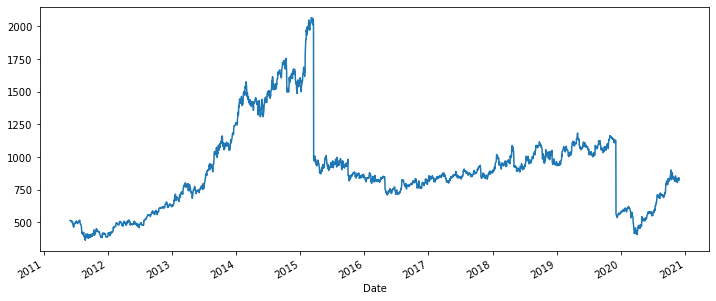

In [6]:
df['Close'].plot(figsize=(12,5))

Data Cleaning

In [7]:
#Data Cleaning
HCLTechStockData = StockData.dropna()


HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)
  
HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-2']
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

Data Exploration

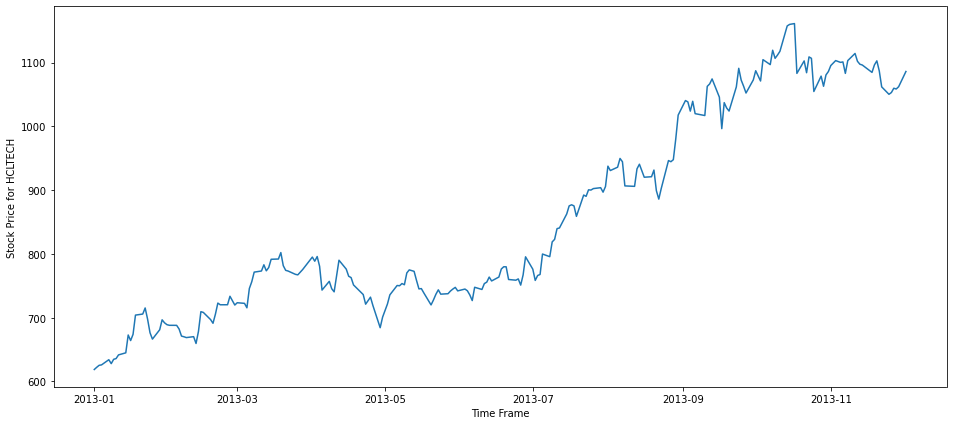

In [9]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

Determing rolling statistics

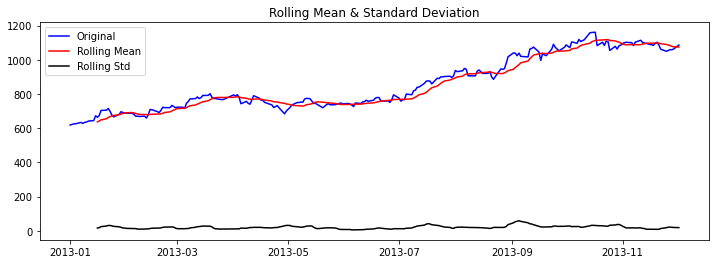

In [10]:
#Determing rolling statistics
rolLmean = HCLTechStockData.rolling(12).mean()
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(12,4))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#making series stationary

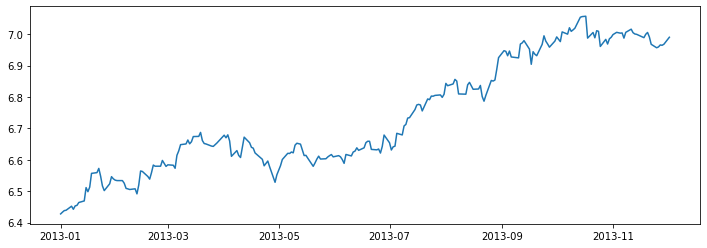

In [11]:
#Lets try transformation
plt.figure(figsize=(12,4))
fig = plt.figure(1)

# import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

For time series analysis we separate Trend and Seasonality from the time series.

<Figure size 432x288 with 0 Axes>

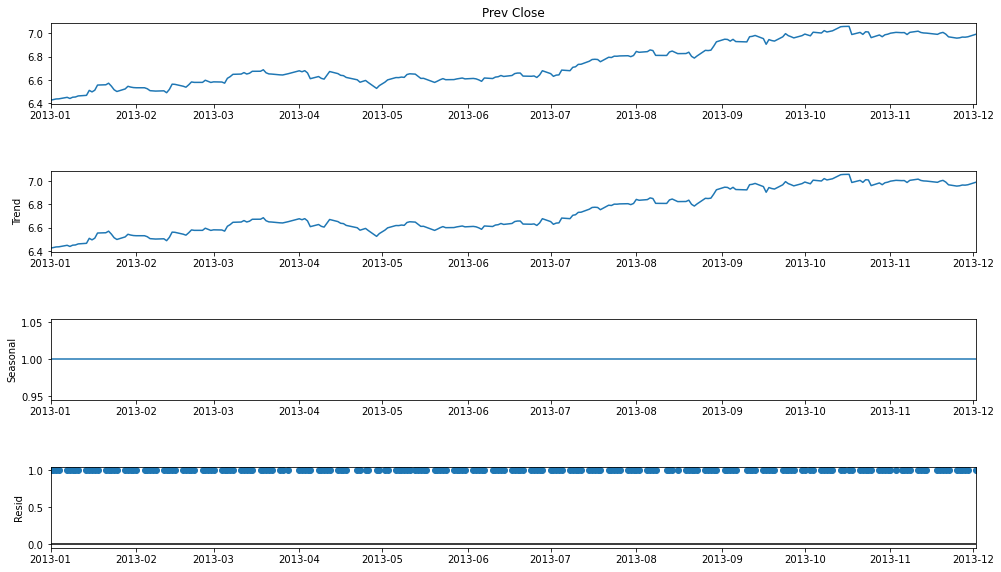

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts_log, model='multiplicative', period = 1)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

Running Dickey-Fuller Test

In [13]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Close'])

1. ADF :  -2.337087366805499
2. P-Value :  0.16028532309534943
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 2353
5. Critical Values :
	 1% :  -3.433132170938598
	 5% :  -2.8627691145928087
	 10% :  -2.567424311005166


Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

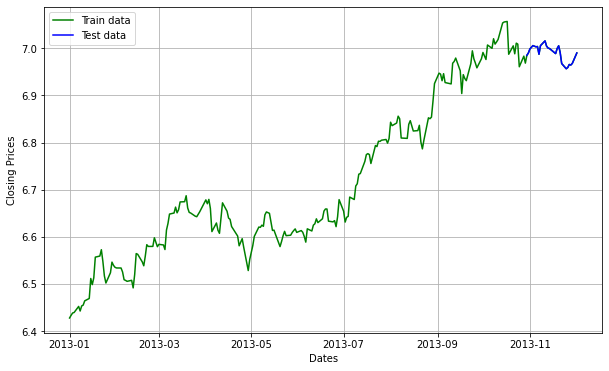

In [14]:
from pmdarima import auto_arima
train=df.iloc[:30]
test=df.iloc[:30]
train_data, test_data = ts_log[3:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(ts_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [15]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1017.727, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1015.738, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1015.741, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1016.141, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1013.761, Time=0.36 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.251 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 510.863
Date:                Sat, 28 Jan 2023   AIC                          -1017.727
Time:                        20:28:59   BIC                          -1011.101
Sample:                             0   HQIC                         -1015.046
                                - 204                                  

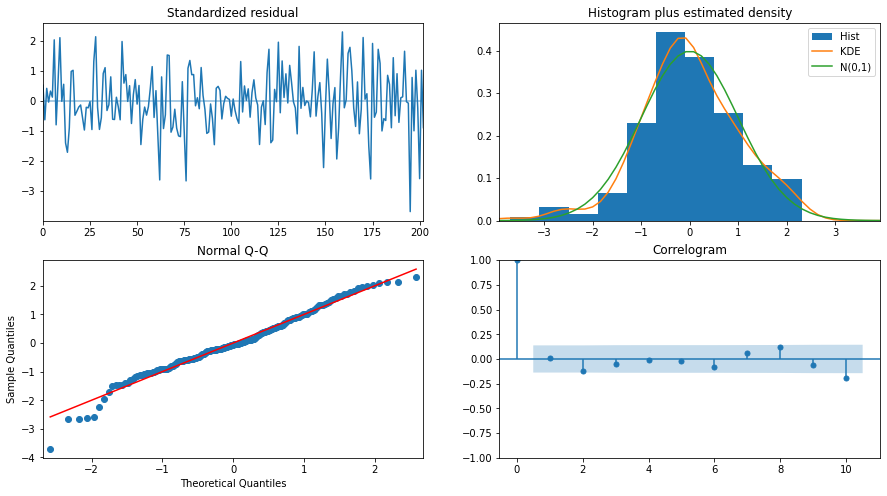

In [16]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [17]:
model = ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit()
print(fitted.summary())

# newer version of statsmodels. disp
# import statsmodels.api as smapi
# model = smapi.tsa.arima.ARIMA(train_data, order=(3,1,2))
# result = model.fit()
# print(result.summary())

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Prev Close   No. Observations:                  204
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 512.376
Date:                Sat, 28 Jan 2023   AIC                          -1012.752
Time:                        20:29:09   BIC                           -992.873
Sample:                             0   HQIC                         -1004.710
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0335      0.097      0.344      0.731      -0.157       0.224
ar.L2          0.9137      0.055     16.482      0.000       0.805       1.022
ar.L3          0.0373      0.076      0.490      0.6

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


496.06166666666667

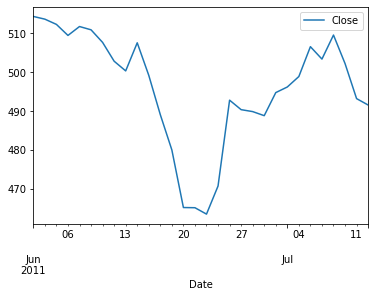

In [18]:
test['Close'].plot(legend=True)
test['Close'].mean()

In [19]:
model2=ARIMA(df[ "Close" ],order=(1,0,5))
model2=model2.fit()
df.tail()

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-11-23,HCLTECH,EQ,819.25,825.0,842.0,816.25,838.50,839.20,832.35,7116516,5.923459e+14,139507.0,2607441.0,0.3664
2020-11-24,HCLTECH,EQ,839.20,843.9,857.4,835.35,841.00,840.50,847.95,8465615,7.178406e+14,169850.0,2882146.0,0.3405
2020-11-25,HCLTECH,EQ,840.50,840.5,846.0,822.50,825.00,824.70,829.08,5610232,4.651325e+14,124023.0,2224611.0,0.3965
2020-11-26,HCLTECH,EQ,824.70,824.1,845.0,819.60,841.20,842.05,834.43,8414555,7.021383e+14,138751.0,2752455.0,0.3271
2020-11-27,HCLTECH,EQ,842.05,842.0,847.8,814.35,823.15,822.10,827.29,11723771,9.698927e+14,154427.0,6387431.0,0.5448


In [20]:
index_future_dates=pd.date_range(start="2021-04-30", end="2021-05-30")
pred=model2.predict(start=len(df),end=len(df)+30,typ="levels").rename("Stock Predictions")
pred.index=index_future_dates
print(pred)

2021-04-30    822.953983
2021-05-01    822.424074
2021-05-02    823.250444
2021-05-03    823.689902
2021-05-04    823.813049
2021-05-05    824.134438
2021-05-06    824.454362
2021-05-07    824.772830
2021-05-08    825.089848
2021-05-09    825.405422
2021-05-10    825.719558
2021-05-11    826.032265
2021-05-12    826.343547
2021-05-13    826.653411
2021-05-14    826.961865
2021-05-15    827.268914
2021-05-16    827.574564
2021-05-17    827.878823
2021-05-18    828.181696
2021-05-19    828.483189
2021-05-20    828.783310
2021-05-21    829.082064
2021-05-22    829.379458
2021-05-23    829.675497
2021-05-24    829.970188
2021-05-25    830.263537
2021-05-26    830.555550
2021-05-27    830.846233
2021-05-28    831.135592
2021-05-29    831.423634
2021-05-30    831.710364
Freq: D, Name: Stock Predictions, dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

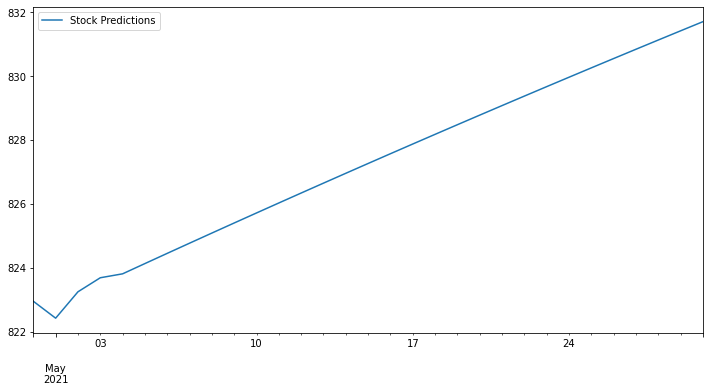

In [21]:
pred.plot(figsize=(12,6),legend=True)